In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import csv
from pandas import DataFrame,date_range
import matplotlib.dates as mdates

In [2]:
SCK1 = pd.read_csv('SCK1_Mar11reeseoffice.csv')
SCK2 = pd.read_csv('SCK2_Mar11reeseofficetest.csv')
SCK3 = pd.read_csv('SCK3_Mar11reeseofficetest.csv')

In [3]:
print SCK1.shape
print SCK2.shape
print SCK3.shape

(4886, 9)
(4799, 9)
(4707, 9)


In [4]:
def status(array):
    print 'Start =',min(array),'  End =',max(array),'  Length =', len(array)

In [5]:
# finding indecies of the garbage at the beginning to ignore it
status(SCK1[' UTC'][35:]) # seconds between on and when it was programmed
status(SCK2[' UTC'][3:])
status(SCK3[' UTC'][3:])

Start = 2016-03-11 09:28:01   End = 2016-03-11 10:49:05   Length = 4851
Start = 2016-03-11 09:29:16   End = 2016-03-11 10:49:17   Length = 4796
Start = 2016-03-11 09:30:05   End = 2016-03-11 10:48:48   Length = 4704


In [6]:
sck1_time = pd.to_datetime(SCK1[' UTC'])
sck2_time = pd.to_datetime(SCK2[' UTC'])
sck3_time = pd.to_datetime(SCK3[' UTC'])

In [7]:
# SHORTED
# get_datetime = lambda s: datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S")

In [8]:
SCK1new = []
for i in range(35,len(sck1_time)):
    ddt = datetime.datetime.strptime(str(sck1_time[i]),"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=0)
    SCK1new = np.append(adj,SCK1new)
SCK1new = SCK1new[::-1]

SCK2new = []
for i in range(3,len(sck2_time)):
    ddt = datetime.datetime.strptime(str(sck2_time[i]),"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=-12)
    SCK2new = np.append(adj,SCK2new)
SCK2new = SCK2new[::-1]

SCK3new = []
for i in range(3,len(sck3_time)):
    ddt = datetime.datetime.strptime(str(sck3_time[i]),"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=0)
    SCK3new = np.append(adj,SCK3new)
SCK3new = SCK3new[::-1]

In [9]:
# SCK1x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in sck1_time]
# SCK2x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in sck2_time] 
# SCK3x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in sck3_time]
xfmt = mdates.DateFormatter('%H:%M')

In [10]:
SCK1 = SCK1[35:]
SCK2 = SCK2[3:]
SCK3 = SCK3[3:]

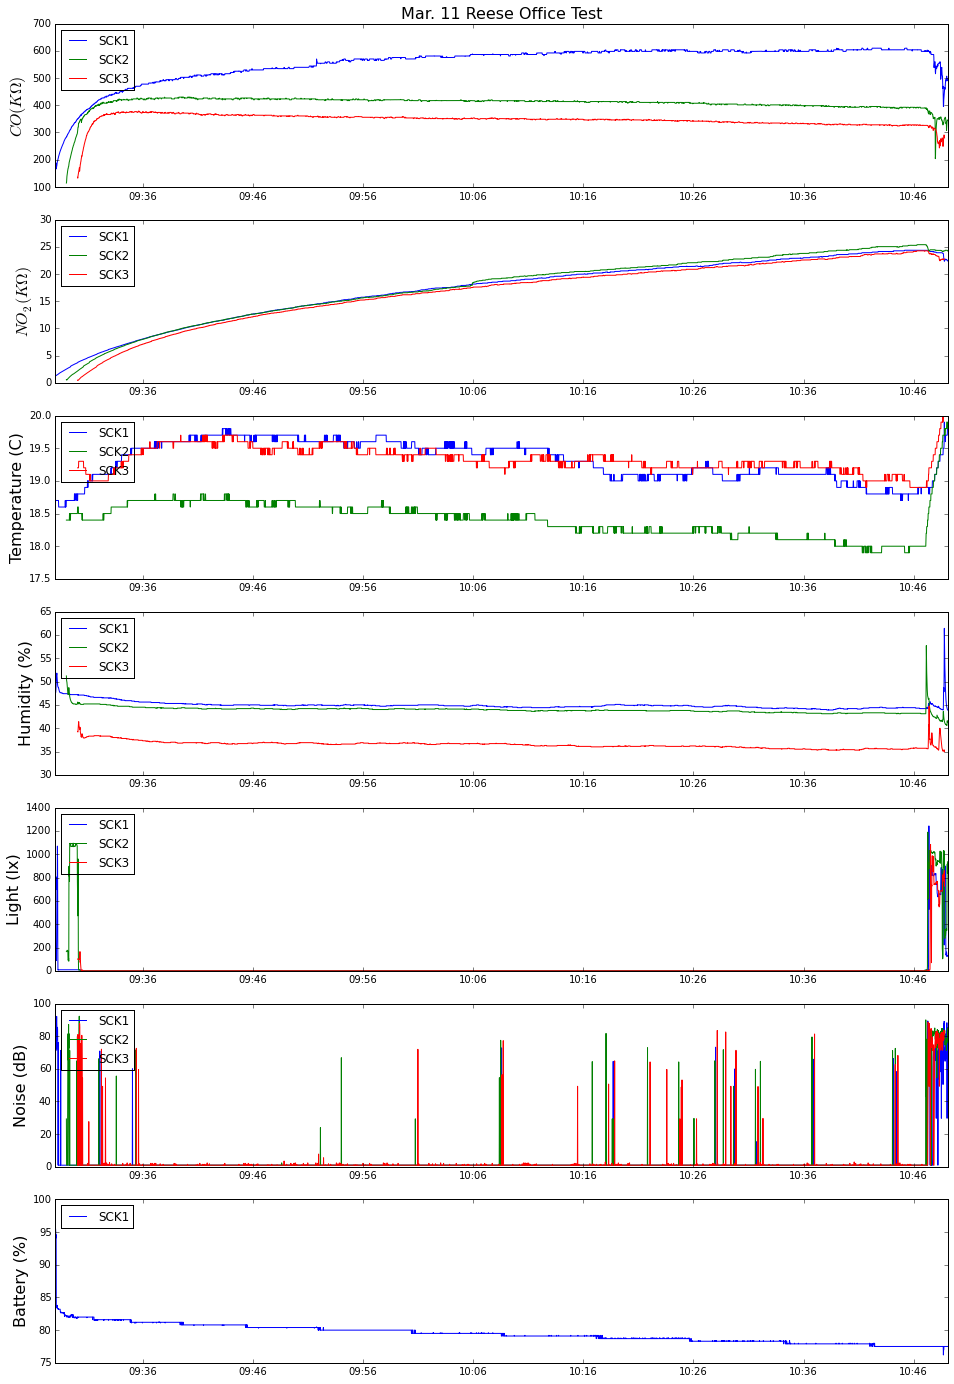

In [11]:
fig = plt.figure(figsize=(16,24))
ax1 = fig.add_subplot(711)
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax1.plot(SCK1new,SCK1[' Carbon Monxide ( kOhm) '],label='SCK1')
ax1.plot(SCK2new,SCK2[' Carbon Monxide ( kOhm) '],label='SCK2')
ax1.plot(SCK3new,SCK3[' Carbon Monxide ( kOhm) '],label='SCK3') # take out first 3 rows: error
ax1.set_ylabel('$CO (K\Omega)$', fontsize=16)
ax1.set_title('Mar. 11 Reese Office Test', fontsize=16)
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(712)
ax2.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax2.plot(SCK1new,SCK1[' Nitrogen Dioxide ( kOhm) '],label='SCK1')
ax2.plot(SCK2new,SCK2[' Nitrogen Dioxide ( kOhm) '],label='SCK2')
ax2.plot(SCK3new,SCK3[' Nitrogen Dioxide ( kOhm) '],label='SCK3') # take out first 3 rows: error
ax2.set_ylabel('$NO_2 (K\Omega)$', fontsize=16)
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(713)
ax3.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax3.plot(SCK1new,SCK1['Temperature ( C) '],label='SCK1')
ax3.plot(SCK2new,SCK2['Temperature ( C) '],label='SCK2')
ax3.plot(SCK3new,SCK3['Temperature ( C) '],label='SCK3') # take out first 3 rows: error
ax3.set_ylabel('Temperature (C)', fontsize=16)
ax3.legend(loc='upper left')

ax4 = fig.add_subplot(714)
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax4.plot(SCK1new,SCK1[' Humidity ( %) '],label='SCK1')
ax4.plot(SCK2new,SCK2[' Humidity ( %) '],label='SCK2')
ax4.plot(SCK3new,SCK3[' Humidity ( %) '],label='SCK3') # take out first 3 rows: error
ax4.set_ylabel('Humidity (%)', fontsize=16)
ax4.legend(loc='upper left')

ax5 = fig.add_subplot(715)
ax5.xaxis.set_major_formatter(xfmt)
ax5.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax5.plot(SCK1new,SCK1[' Light ( lx) '],label='SCK1')
ax5.plot(SCK2new,SCK2[' Light ( lx) '],label='SCK2')
ax5.plot(SCK3new,SCK3[' Light ( lx) '],label='SCK3') # take out first 3 rows: error
ax5.set_ylabel('Light (lx)', fontsize=16)
ax5.legend(loc='upper left')

ax6 = fig.add_subplot(716)
ax6.xaxis.set_major_formatter(xfmt)
ax6.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax6.plot(SCK1new,SCK1[' Noise ( dB) '],label='SCK1')
ax6.plot(SCK2new,SCK2[' Noise ( dB) '],label='SCK2')
ax6.plot(SCK3new,SCK3[' Noise ( dB) '],label='SCK3') # take out first 3 rows: error
ax6.set_ylabel('Noise (dB)', fontsize=16)
ax6.legend(loc='upper left')

ax7 = fig.add_subplot(717)
ax7.xaxis.set_major_formatter(xfmt)
ax7.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax7.plot(SCK1new,SCK1[' Battery ( %) '],label='SCK1')
#ax7.plot(SCK2new,SCK2[' Battery ( %) '],label='SCK2')
#ax7.plot(SCK3new,SCK3[' Battery ( %) '],label='SCK3') # take out first 3 rows: error
ax7.set_ylabel('Battery (%)', fontsize=16)
ax7.legend(loc='upper left')

#plt.savefig('SCK_Mar11test.eps', format='eps', dpi=1200)